# Develop a Convolutional Neural Network From Scratch for  MNIST Handwritten Digit Classification.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mnist.npz to mnist (1).npz


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.8189 - loss: 0.5731 - val_accuracy: 0.9724 - val_loss: 0.0894
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9738 - loss: 0.0860 - val_accuracy: 0.9772 - val_loss: 0.0782
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9821 - loss: 0.0596 - val_accuracy: 0.9799 - val_loss: 0.0693
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9875 - loss: 0.0417 - val_accuracy: 0.9818 - val_loss: 0.0581
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9885 - loss: 0.0350 - val_accuracy: 0.9823 - val_loss: 0.0605
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9915 - loss: 0.0266 - val_accuracy: 0.9858 - val_loss: 0.0440
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9935 - loss: 0.0197 - val_accuracy: 0.9859 - val_loss: 0.0481
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9942 - loss: 0.0179 - 

Test loss: 0.0527
Test accuracy: 0.9865


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


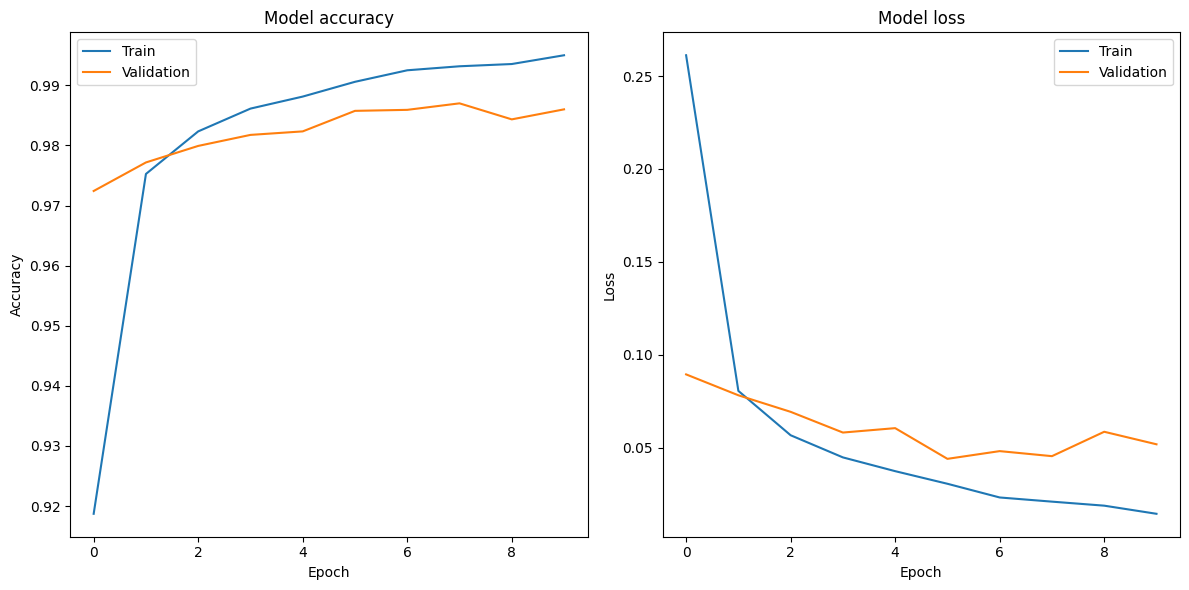

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with the updated checkpoint callback
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[checkpoint])

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

# Save the entire model
model.save('mnist_cnn_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

# Make predictions
predictions = loaded_model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()
